In [ ]:

from google.colab import drive

In [ ]:
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
np.random.seed (1111)
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from  keras.datasets import mnist
from  keras.models import Model
from  keras.layers import *
from  keras import optimizers
from  sklearn.model_selection import train_test_split
from  keras.utils.np_utils import to_categorical

In [ ]:
df_train = pd.read_csv ('/content/drive/MyDrive/Content/mnist_train.csv') #tutorial
df_test = pd.read_csv ('/content/drive/MyDrive/Content/mnist_test.csv') #check

In [ ]:
df_train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(10000, 784)


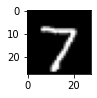

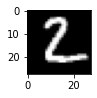

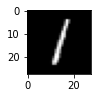

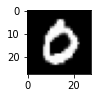

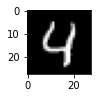

In [ ]:
df_features = df_train.iloc[:, 1:785]
df_label = df_train.iloc[:, 0]
X_test = df_test.iloc[:, 0:784]
X_train = df_test.iloc[:, 1:785]
X_train = X_train.values.reshape(10000, 28, 28)
print(X_test.shape)
for i in range(5):  
  plt.subplot(330 + 1 + i)
  plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
  plt.show()


In [ ]:
################################
################################
################################
################################
#from keras.datasets import mnist
#
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
#print(x_test.shape)
#for i in range(5):  
#  plt.subplot(330 + 1 + i)
#  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
#  plt.show()
#  
################################
################################
################################
################################

In [ ]:
X_train, X_cv, y_train, y_cv = train_test_split(df_features, df_label,
                                                test_size = 0.2,
                                                random_state = 1111)
X_train = X_train.values.reshape(48000, 784)
x_cv = X_cv.values.reshape(12000, 784) 
X_test = X_test.values.reshape(10000, 784)


In [ ]:
X_train = X_train.astype('float32'); X_cv.astype('float32'); X_test.astype('float32')

num_digits = 10
y_train = to_categorical(y_train, num_digits)
y_cv = to_categorical(y_cv, num_digits)

In [ ]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
print(y_train[1]) 
print(y_train[3])   

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
n_input = 784
n_hidden_1 = 300  
n_hidden_2 = 100
num_digits = 10

In [ ]:
Inp = Input(shape = (784,))
x = Dense(n_hidden_1, activation='relu', name = 'hidden_layer_1')(Inp)
x = Dense(n_hidden_2, activation='relu', name = 'hidden_layer_2')(x)
output = Dense(num_digits, activation='softmax', name = 'out_layer')(x)

In [ ]:
model = Model(Inp, output)
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 784)]             0         
                                                                 
 hidden_layer_1 (Dense)      (None, 300)               235500    
                                                                 
 hidden_layer_2 (Dense)      (None, 100)               30100     
                                                                 
 out_layer (Dense)           (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
learning_rate = 0.1
training_epochs = 20
batch_size = 100
sgd = tf.keras.optimizers.SGD(learning_rate)
rmsprop = tf.keras.optimizers.RMSprop(learning_rate)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics=['accuracy'])

In [ ]:
history1 = model.fit(X_train, y_train,
                      batch_size = batch_size,
                      epochs = training_epochs,
                      verbose = 2,
                      validation_data=(X_cv, y_cv))

Epoch 1/20
480/480 - 4s - loss: 2.9982 - accuracy: 0.8278 - val_loss: 0.4142 - val_accuracy: 0.9047 - 4s/epoch - 7ms/step
Epoch 2/20
480/480 - 3s - loss: 0.3771 - accuracy: 0.9194 - val_loss: 0.7381 - val_accuracy: 0.8818 - 3s/epoch - 6ms/step
Epoch 3/20
480/480 - 3s - loss: 0.2854 - accuracy: 0.9395 - val_loss: 0.4192 - val_accuracy: 0.9455 - 3s/epoch - 7ms/step
Epoch 4/20
480/480 - 4s - loss: 0.2306 - accuracy: 0.9528 - val_loss: 0.5226 - val_accuracy: 0.9319 - 4s/epoch - 9ms/step
Epoch 5/20
480/480 - 3s - loss: 0.1969 - accuracy: 0.9580 - val_loss: 0.2538 - val_accuracy: 0.9569 - 3s/epoch - 6ms/step
Epoch 6/20
480/480 - 3s - loss: 0.1848 - accuracy: 0.9635 - val_loss: 0.3354 - val_accuracy: 0.9597 - 3s/epoch - 6ms/step
Epoch 7/20
480/480 - 3s - loss: 0.1639 - accuracy: 0.9672 - val_loss: 0.3326 - val_accuracy: 0.9636 - 3s/epoch - 6ms/step
Epoch 8/20
480/480 - 3s - loss: 0.1479 - accuracy: 0.9718 - val_loss: 0.3295 - val_accuracy: 0.9580 - 3s/epoch - 6ms/step
Epoch 9/20
480/480 - 3s 

In [ ]:
n_input = 784
n_hidden_1 = 300  
n_hidden_2 = 100
num_digits = 10

In [ ]:
Inp = Input(shape = (784,))
x = Dense(n_hidden_1, activation='relu', name = 'hidden_layer_1')(Inp)
x = Dense(n_hidden_2, activation='relu', name = 'hidden_layer_2')(x)
output = Dense(num_digits, activation='softmax', name = 'out_layer')(x)

In [ ]:
modelsdg = Model(Inp, output)
modelsdg.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 hidden_layer_1 (Dense)      (None, 300)               235500    
                                                                 
 hidden_layer_2 (Dense)      (None, 100)               30100     
                                                                 
 out_layer (Dense)           (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
learning_rate = 0.1
training_epochs = 20
batch_size = 100
sgd = tf.keras.optimizers.SGD(learning_rate)

In [ ]:
modelsdg.compile(loss='categorical_crossentropy',
              optimizer = 'sgd',
              metrics=['accuracy'])


In [ ]:
historysdg = model.fit(X_train, y_train,
                      batch_size = batch_size,
                      epochs = training_epochs,
                      verbose = 2,
                      validation_data=(X_cv, y_cv))

Epoch 1/20
480/480 - 5s - loss: 0.1123 - accuracy: 0.9833 - val_loss: 0.7056 - val_accuracy: 0.9652 - 5s/epoch - 10ms/step
Epoch 2/20
480/480 - 4s - loss: 0.0987 - accuracy: 0.9834 - val_loss: 0.8141 - val_accuracy: 0.9642 - 4s/epoch - 8ms/step
Epoch 3/20
480/480 - 3s - loss: 0.1090 - accuracy: 0.9842 - val_loss: 0.8185 - val_accuracy: 0.9603 - 3s/epoch - 6ms/step
Epoch 4/20
480/480 - 3s - loss: 0.1093 - accuracy: 0.9840 - val_loss: 0.7508 - val_accuracy: 0.9660 - 3s/epoch - 6ms/step
Epoch 5/20
480/480 - 3s - loss: 0.0983 - accuracy: 0.9849 - val_loss: 0.7557 - val_accuracy: 0.9668 - 3s/epoch - 6ms/step
Epoch 6/20
480/480 - 4s - loss: 0.1007 - accuracy: 0.9845 - val_loss: 0.7635 - val_accuracy: 0.9656 - 4s/epoch - 8ms/step
Epoch 7/20
480/480 - 4s - loss: 0.1066 - accuracy: 0.9857 - val_loss: 0.7564 - val_accuracy: 0.9619 - 4s/epoch - 7ms/step
Epoch 8/20
480/480 - 3s - loss: 0.0893 - accuracy: 0.9851 - val_loss: 1.3412 - val_accuracy: 0.9615 - 3s/epoch - 6ms/step
Epoch 9/20
480/480 - 3s

In [ ]:
Inp = Input(shape = (784,))
x = Dense(n_hidden_1, activation='relu', name = 'hidden_layer_1')(Inp)
x = Dense(n_hidden_2, activation='relu', name = 'hidden_layer_2')(x)
output = Dense(num_digits, activation='softmax', name = 'out_layer')(x)

adam = tf.keras.optimizers.Adam(learning_rate)
model2 = Model(Inp, output)

model2.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [ ]:
history2 = model2.fit(X_train, y_train,
                      batch_size = batch_size,
                      epochs = training_epochs,
                      verbose = 2,
                      validation_data=(X_cv, y_cv))

Epoch 1/20
480/480 - 3s - loss: 2.5938 - accuracy: 0.8595 - val_loss: 0.5140 - val_accuracy: 0.8948 - 3s/epoch - 6ms/step
Epoch 2/20
480/480 - 2s - loss: 0.3290 - accuracy: 0.9217 - val_loss: 0.3402 - val_accuracy: 0.9293 - 2s/epoch - 5ms/step
Epoch 3/20
480/480 - 2s - loss: 0.2124 - accuracy: 0.9458 - val_loss: 0.3029 - val_accuracy: 0.9357 - 2s/epoch - 5ms/step
Epoch 4/20
480/480 - 2s - loss: 0.1629 - accuracy: 0.9546 - val_loss: 0.2652 - val_accuracy: 0.9407 - 2s/epoch - 5ms/step
Epoch 5/20
480/480 - 3s - loss: 0.1291 - accuracy: 0.9645 - val_loss: 0.2245 - val_accuracy: 0.9497 - 3s/epoch - 6ms/step
Epoch 6/20
480/480 - 2s - loss: 0.1145 - accuracy: 0.9690 - val_loss: 0.2039 - val_accuracy: 0.9514 - 2s/epoch - 5ms/step
Epoch 7/20
480/480 - 2s - loss: 0.0994 - accuracy: 0.9717 - val_loss: 0.1866 - val_accuracy: 0.9597 - 2s/epoch - 5ms/step
Epoch 8/20
480/480 - 2s - loss: 0.0892 - accuracy: 0.9741 - val_loss: 0.1855 - val_accuracy: 0.9592 - 2s/epoch - 5ms/step
Epoch 9/20
480/480 - 2s 

In [ ]:
Inp = Input(shape = (784,))
x = Dense(n_hidden_1, activation='softmax', name = 'hidden_layer_1')(Inp)
x = Dense(n_hidden_2, activation='softmax', name = 'hidden_layer_2')(x)
output = Dense(num_digits, activation='softmax', name = 'out_layer')(x)

adam = tf.keras.optimizers.Adam(learning_rate)
model22 = Model(Inp, output)

model22.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [ ]:
history22 = model22.fit(X_train, y_train,
                      batch_size = batch_size,
                      epochs = training_epochs,
                      verbose = 2,
                      validation_data=(X_cv, y_cv))

Epoch 1/20
480/480 - 3s - loss: 2.2554 - accuracy: 0.2742 - val_loss: 2.1487 - val_accuracy: 0.5210 - 3s/epoch - 7ms/step
Epoch 2/20
480/480 - 2s - loss: 1.8673 - accuracy: 0.5596 - val_loss: 1.5638 - val_accuracy: 0.5638 - 2s/epoch - 5ms/step
Epoch 3/20
480/480 - 2s - loss: 1.3788 - accuracy: 0.5665 - val_loss: 1.2387 - val_accuracy: 0.5684 - 2s/epoch - 5ms/step
Epoch 4/20
480/480 - 3s - loss: 1.1880 - accuracy: 0.5714 - val_loss: 1.1225 - val_accuracy: 0.5755 - 3s/epoch - 6ms/step
Epoch 5/20
480/480 - 2s - loss: 1.0795 - accuracy: 0.6089 - val_loss: 1.0744 - val_accuracy: 0.5967 - 2s/epoch - 5ms/step
Epoch 6/20
480/480 - 2s - loss: 1.0259 - accuracy: 0.6119 - val_loss: 0.9899 - val_accuracy: 0.6135 - 2s/epoch - 5ms/step
Epoch 7/20
480/480 - 2s - loss: 0.9832 - accuracy: 0.6189 - val_loss: 0.9957 - val_accuracy: 0.6246 - 2s/epoch - 5ms/step
Epoch 8/20
480/480 - 2s - loss: 0.9779 - accuracy: 0.6175 - val_loss: 0.9392 - val_accuracy: 0.6282 - 2s/epoch - 5ms/step
Epoch 9/20
480/480 - 2s 

In [ ]:
n_input = 784
n_hidden_1 = 300
n_hidden_2 = 100
n_hidden_3 = 200
n_hidden_4 = 100
n_hidden_5 = 200
num_digits = 10

In [ ]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = 'hidden_layer_1')(Inp)
x = Dense(n_hidden_2, activation='relu', name = 'hidden_layer_2')(x)
x = Dense(n_hidden_3, activation='relu', name = 'hidden_layer_3')(x)
x = Dense(n_hidden_4, activation='relu', name = 'hidden_layer_4')(x)
x = Dense(n_hidden_5, activation='relu', name = 'hidden_layer_5')(x)
output = Dense(num_digits, activation='softmax', name = 'out_layer')(x)

In [ ]:
model3 = Model(Inp, output)
model3.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 hidden_layer_1 (Dense)      (None, 300)               235500    
                                                                 
 hidden_layer_2 (Dense)      (None, 100)               30100     
                                                                 
 hidden_layer_3 (Dense)      (None, 200)               20200     
                                                                 
 hidden_layer_4 (Dense)      (None, 100)               20100     
                                                                 
 hidden_layer_5 (Dense)      (None, 200)               20200     
                                                                 
 out_layer (Dense)           (None, 10)                2010

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.01)
model3 = Model(Inp, output)

model3.compile(loss = 'categorical_crossentropy',
               optimizer = 'adam',
               metrics=['accuracy'])

In [ ]:
history3 = model3.fit(X_train, y_train,
                      batch_size = batch_size,
                      epochs = training_epochs,
                      validation_data=(X_cv, y_cv))

Epoch 1/20
480/480 [==============================] - 4s 7ms/step - loss: 0.7201 - accuracy: 0.8687 - val_loss: 0.2527 - val_accuracy: 0.9275
Epoch 2/20
480/480 [==============================] - 3s 7ms/step - loss: 0.1866 - accuracy: 0.9461 - val_loss: 0.1952 - val_accuracy: 0.9436
Epoch 3/20
480/480 [==============================] - 4s 8ms/step - loss: 0.1393 - accuracy: 0.9582 - val_loss: 0.1590 - val_accuracy: 0.9555
Epoch 4/20
480/480 [==============================] - 4s 8ms/step - loss: 0.1126 - accuracy: 0.9657 - val_loss: 0.1449 - val_accuracy: 0.9622
Epoch 5/20
480/480 [==============================] - 4s 8ms/step - loss: 0.0978 - accuracy: 0.9705 - val_loss: 0.1236 - val_accuracy: 0.9663
Epoch 6/20
480/480 [==============================] - 4s 8ms/step - loss: 0.0838 - accuracy: 0.9751 - val_loss: 0.1263 - val_accuracy: 0.9671
Epoch 7/20
480/480 [==============================] - 4s 8ms/step - loss: 0.0866 - accuracy: 0.9746 - val_loss: 0.1526 - val_accuracy: 0.9644
Epoch 

In [ ]:
test_pred = pd.DataFrame(model22.predict(X_test, batch_size=200))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageID'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageID'] = test_pred['ImageID'] + 1

test_pred.head()

,ImageID,Label
0,1,7
1,2,3
2,3,1
3,4,0
4,5,4


In [ ]:
test_pred = pd.DataFrame(model2.predict(X_test, batch_size=200))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageID'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageID'] = test_pred['ImageID'] + 1

test_pred.head()

,ImageID,Label
0,1,7
1,2,2
2,3,1
3,4,0
4,5,4


In [ ]:
test_pred = pd.DataFrame(model3.predict(X_test, batch_size=200))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageID'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageID'] = test_pred['ImageID'] + 1

test_pred.head()

,ImageID,Label
0,1,7
1,2,2
2,3,1
3,4,0
4,5,4
